# Desempeño de estudiantes



### Descripción del problema

El modelo busca predecir el desempeño de un estudiante en la educación secundaria.

### Descripción de los datos

Datos de los estudiantes en un curso del idioma Portugués.

* 1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira) 
* 2 sex - student's sex (binary: 'F' - female or 'M' - male) 
* 3 age - student's age (numeric: from 15 to 22) 
* 4 address - student's home address type (binary: 'U' - urban or 'R' - rural) 
* 5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3) 
* 6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart) 
* 7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education) 
* 8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education) 
* 9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') 
* 10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') 
* 11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other') 
* 12 guardian - student's guardian (nominal: 'mother', 'father' or 'other') 
* 13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour) 
* 14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours) 
* 15 failures - number of past class failures (numeric: n if 1<=n<3, else 4) 
* 16 schoolsup - extra educational support (binary: yes or no) 
* 17 famsup - family educational support (binary: yes or no) 
* 18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no) 
* 19 activities - extra-curricular activities (binary: yes or no) 
* 20 nursery - attended nursery school (binary: yes or no) 
* 21 higher - wants to take higher education (binary: yes or no) 
* 22 internet - Internet access at home (binary: yes or no) 
* 23 romantic - with a romantic relationship (binary: yes or no) 
* 24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent) 
* 25 freetime - free time after school (numeric: from 1 - very low to 5 - very high) 
* 26 goout - going out with friends (numeric: from 1 - very low to 5 - very high) 
* 27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high) 
* 28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high) 
* 29 health - current health status (numeric: from 1 - very bad to 5 - very good) 
* 30 absences - number of school absences (numeric: from 0 to 93) 
* 31 G1 - first period grade (numeric: from 0 to 20) 
* 32 G2 - second period grade (numeric: from 0 to 20) 

### Predición

La nota final del curso.

G3 - final grade (numeric: from 0 to 20, output target)

### Selección del modelo

La situación puede ser enfocada tanto como un problema de clasificación o regresión, ya que la predicción que el modelo hace es un valor numérico pero sin embargo se consideran restricciones.

### Fuente de la base de datos

UCI Machine Learning Repository: Student Performace Data Set (https://archive.ics.uci.edu/ml/datasets/student+performance)

## Data Set

Importamos las librerías necesarias para este notebook

In [45]:
import utils, pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Importamos los datos

In [46]:
df_raw = pd.read_csv('../python-ml-course/datasets/student/student-por.csv',sep=";")
df_raw.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [47]:
# Descripción de los datos
df_raw.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [48]:
# Tamaño de los datos
df_raw.shape

(649, 33)

In [49]:
# Tipo de datos de cada atributo
df_raw.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

## Preprocesamiento

Buscamos las varibles numéricas

In [50]:
num_vars = [c for c in df_raw if pd.api.types.is_numeric_dtype(df_raw[c])]
num_vars

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

Para poder usar los datos en un modelo de clasificación de árboles de decisión se necesita prepocesar los datos del tipo categóricos.

In [51]:
cat_vars = [c for c in df_raw if not pd.api.types.is_numeric_dtype(df_raw[c])]
cat_vars

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [52]:
df_raw[cat_vars].nunique()

school        2
sex           2
address       2
famsize       2
Pstatus       2
Mjob          5
Fjob          5
reason        4
guardian      3
schoolsup     2
famsup        2
paid          2
activities    2
nursery       2
higher        2
internet      2
romantic      2
dtype: int64

Generamos un diccionario de códigos para las variables categóricas

In [53]:
cat_dict = {}

for cat in cat_vars:
    df_raw[cat] = df_raw[cat].astype('category')
    cat_dict[cat] = {i+1:e for i,e in enumerate(df_raw[cat].cat.categories)}

cat_dict

{'school': {1: 'GP', 2: 'MS'},
 'sex': {1: 'F', 2: 'M'},
 'address': {1: 'R', 2: 'U'},
 'famsize': {1: 'GT3', 2: 'LE3'},
 'Pstatus': {1: 'A', 2: 'T'},
 'Mjob': {1: 'at_home', 2: 'health', 3: 'other', 4: 'services', 5: 'teacher'},
 'Fjob': {1: 'at_home', 2: 'health', 3: 'other', 4: 'services', 5: 'teacher'},
 'reason': {1: 'course', 2: 'home', 3: 'other', 4: 'reputation'},
 'guardian': {1: 'father', 2: 'mother', 3: 'other'},
 'schoolsup': {1: 'no', 2: 'yes'},
 'famsup': {1: 'no', 2: 'yes'},
 'paid': {1: 'no', 2: 'yes'},
 'activities': {1: 'no', 2: 'yes'},
 'nursery': {1: 'no', 2: 'yes'},
 'higher': {1: 'no', 2: 'yes'},
 'internet': {1: 'no', 2: 'yes'},
 'romantic': {1: 'no', 2: 'yes'}}

Convertimos las variables categóricas a numéricas

In [54]:
df = df_raw.copy()

for n,col in df.items():
    if pd.api.types.is_categorical_dtype(col):
        df[n] = col.cat.codes+1
        
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,1,18,2,1,1,4,4,1,5,...,4,3,4,1,1,3,4,0,11,11
1,1,1,17,2,1,2,1,1,1,3,...,5,3,3,1,1,3,2,9,11,11
2,1,1,15,2,2,2,1,1,1,3,...,4,3,2,2,3,3,6,12,13,12
3,1,1,15,2,1,2,4,2,2,4,...,3,2,2,1,1,5,0,14,14,14
4,1,1,16,2,1,2,3,3,3,3,...,4,3,2,1,2,5,0,11,13,13


## Data faltante

No hay data faltante

In [55]:
df_raw[cat_vars].isna().sum()

school        0
sex           0
address       0
famsize       0
Pstatus       0
Mjob          0
Fjob          0
reason        0
guardian      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
dtype: int64

In [56]:
df_raw[num_vars].isna().sum()

age           0
Medu          0
Fedu          0
traveltime    0
studytime     0
failures      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

## Visualizando los datos

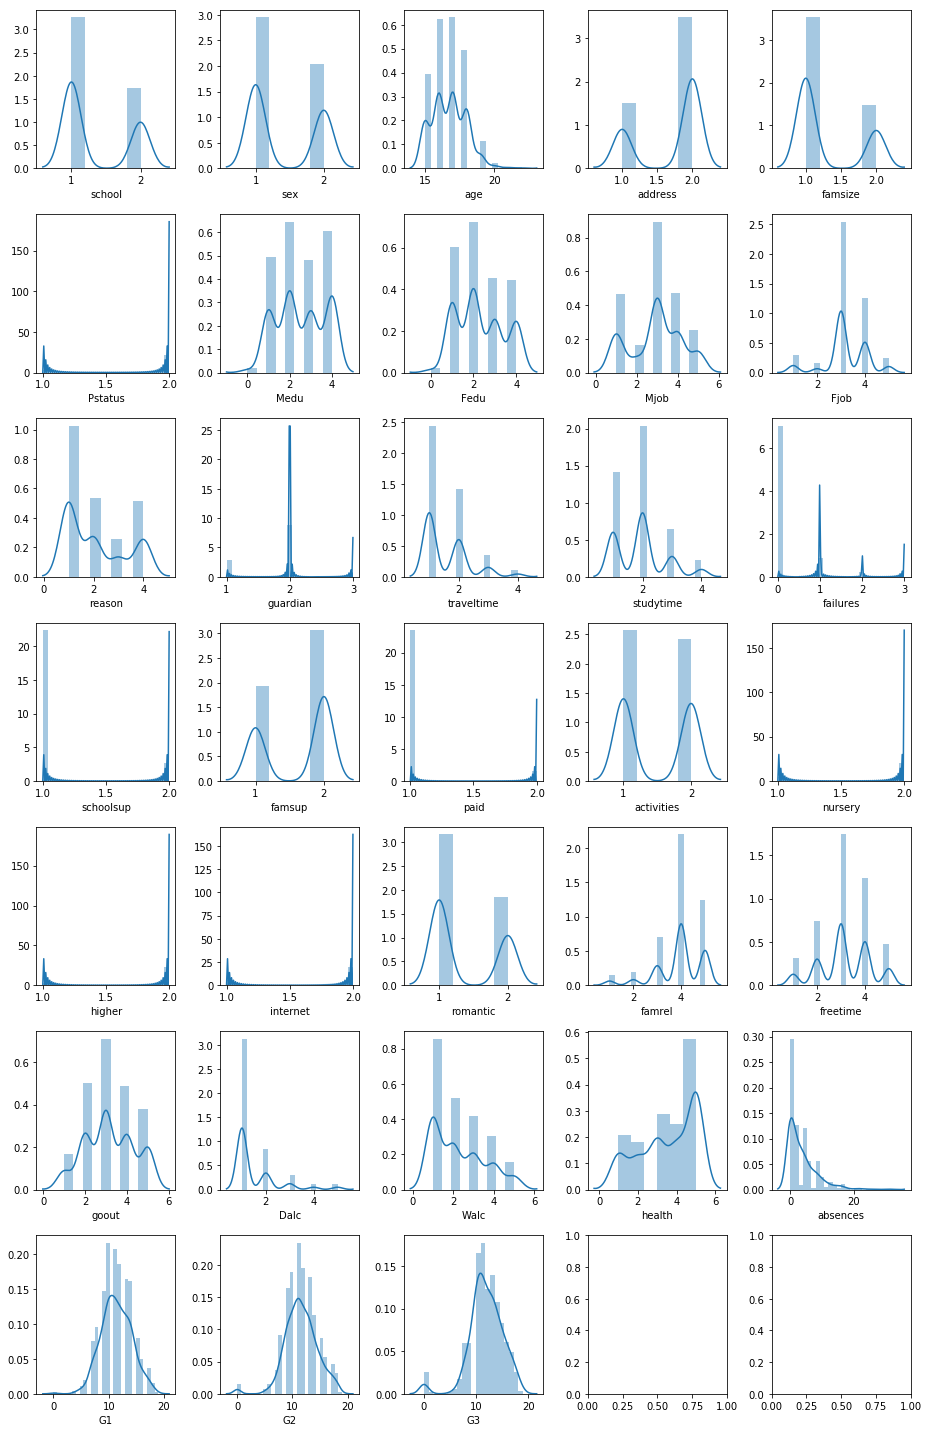

In [57]:
fig, axes = plt.subplots(nrows=7, ncols=5, figsize=(13, 20))

for c, ax in zip(df, axes.flatten()):
    sns.distplot(df[c], ax=ax)
    
plt.tight_layout()

## Train-validation split

Se dividen los datos en dos conjuntos: datos de entrenamiento (80%), datos de validación (20%).

In [58]:
from sklearn.model_selection import train_test_split

x = df.drop('G3', axis=1)
y = df['G3']

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

print(f'Tamaño de los datos de entrenamiento: {x_train.shape} ({x_train.shape[0]/x.shape[0]*100:4.1f}%)')
print(f'Tamaño de los datos de validación: {x_val.shape} ({x_val.shape[0]/x.shape[0]*100:4.1f}%)')

Tamaño de los datos de entrenamiento: (519, 32) (80.0%)
Tamaño de los datos de validación: (130, 32) (20.0%)


## Entrenando los modelos

### Árbol de decisión para clasificación

In [59]:
from sklearn.tree import DecisionTreeClassifier

m = DecisionTreeClassifier()
m.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Evaluamos el modelo con los datos de validación

In [60]:
m.score(x_val, y_val)

0.3923076923076923

Dibujamos el árbol de decisión

In [61]:
import svgling



In [62]:
svgling.draw_tree(m, x_train)

TypeError: object of type 'DecisionTreeClassifier' has no len()

Ajustamos el hiperparámetro de **max_depth** del modelo

In [27]:
m = DecisionTreeClassifier(max_depth=3)
m.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [28]:
m.score(x_val, y_val)

0.46153846153846156

In [29]:
utils.draw_tree(m, x_train)

AttributeError: module 'utils' has no attribute 'draw_tree'

Se puede observar que al ajustar el hiperparámetro de **max_depth** del modelo mejora su precisión. Esto se puede interpretar como que el modelo no requiere de tantas variables para poder hacer una mejor predicción.

### Árbol de decisión para regresión

Convertimos las variables categóricas en columas con indicadores numéricos para entrenar el modelo de árbol de decisión para regresión.

Entrenamos el modelo

In [30]:
from sklearn.tree import DecisionTreeRegressor

m = DecisionTreeRegressor()
m.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

Evaluamos el modelo

In [31]:
m.score(x_val, y_val)

0.7357467051770588

Ajustamos el hiperparámetro de **max_depth**

In [32]:
from sklearn.tree import DecisionTreeRegressor

m = DecisionTreeRegressor(max_depth=3)
m.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [33]:
m.score(x_val, y_val)

0.8022585124119805

Vemos que el accuracy a subido usando un árbol de clasificación para regresión.

## Random Forest

Vamos a usar un Random Forest para hacer regresión. Podemos usar el mismo dataframe que el usamos para entrenar a los árboles.

In [34]:
from sklearn.ensemble import RandomForestRegressor
m = RandomForestRegressor(1500, n_jobs=-1, oob_score=True)
m.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1500, n_jobs=-1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [35]:
m.score(x_val, y_val)

0.8378367363521382

Hubo una mejora en el accuracy

## Interpretación del modelo

### Mean decrease impurity o gini impurity

El **mean decrease impurity** nos da una idea de qué la importancia de cada columna en la predicción

In [36]:
imp = pd.DataFrame({'cols':x_train.columns, 'imp':m.feature_importances_}).sort_values('imp', ascending=False)
imp.style.bar()

,cols,imp
31,G2,0.829878
29,absences,0.0361564
30,G1,0.0189036
2,age,0.00956616
24,freetime,0.0083988
6,Medu,0.0074833
26,Dalc,0.00682259
8,Mjob,0.00678412
25,goout,0.00577931
28,health,0.00554626


### Permutation Importance

También podemos evaluar la importancia de las columnas usando el Permutation Importance

In [37]:
%%time
from rfpimp import importances, plot_importances

imp = importances(m, x_val, y_val)
plot_importances(imp, figsize=(5,9));

TypeError: plot_importances() got an unexpected keyword argument 'figsize'

### Drop-column importance

In [38]:
%%time
from rfpimp import dropcol_importances

imp = dropcol_importances(m, x_train, y_train)
plot_importances(imp, figsize=(5,9));

NameError: name 'plot_importances' is not defined

Se puede observar que las columnas **G3, G1, absences, failures y school** son las que tienen mayor importancia para la predicción. Entonces, probaremos entrenar un Random Forest solo usando esas columnas.

In [39]:
new_x = df[['G2', 'G1', 'absences', 'failures', 'school']]
new_x.head().T

,0,1,2,3,4
G2,11,11,13,14,13
G1,0,9,12,14,11
absences,4,2,6,0,0
failures,0,0,0,0,0
school,1,1,1,1,1


Relalizamos el train-validation slip

In [49]:
from sklearn.model_selection import train_test_split

y = df['G3']

x_train, x_val, y_train, y_val = train_test_split(new_x, y, test_size=0.2, random_state=42)

print(f'Tamaño de los datos de entrenamiento: {x_train.shape} ({x_train.shape[0]/x.shape[0]*100:4.1f}%)')
print(f'Tamaño de los datos de validación: {x_val.shape} ({x_val.shape[0]/x.shape[0]*100:4.1f}%)')

Tamaño de los datos de entrenamiento: (519, 5) (80.0%)
Tamaño de los datos de validación: (130, 5) (20.0%)


Entrenamos un Random Forest

In [50]:
from sklearn.ensemble import RandomForestRegressor
m = RandomForestRegressor(1500, n_jobs=-1, oob_score=True)
m.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1500, n_jobs=-1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

Evaluamos el modelo

In [51]:
m.score(x_val, y_val)

0.8281498605802341

Obtuvimos un similiar acurracy que el modelo que usaba 32 columnas

### Reflexión sobre los modelos

* Para este problema, se pudo obtener un mayor accuracy en la predicción **usando modelos para hacer regresión** (DecisionTreeRegressor y RandomForestRegressor) que modelos de clasificación.


* Luego de analizar la importancia de las columnas, se pudo observar que solo un conjunto de ellas son importantes para la predicción. Se pudo entrenar un RandomForest con solo **6 columnas de las 32 con similar acurracy.**